In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as ptl

In [5]:
note_names = ['A_m', 'Ash_m', 'B_m', 'C', 'Csh', 'D', 'Dsh', 'E', 'F', 'Fsh', 'G', 'Gsh', 'A', 'Ash', 'B', 'C_p', 'Csh_p', 'D_p', 'Dsh_p', 'E_p']

note_form_style = ['sin', 'mndr', 'trin']


note_frequency_Hz = [220, 233.08, 246.94, 261.63, 277.18, 293.67, 311.13, 329.63, 349.23, 369.99, 392, 418.3, 440, 466.16, 493.88, 523.25, 554.36, 587.33, 622.26, 659.26]

DOR_K = 1241.212121

time_step = 1/48000

exp_step = 0.007


In [7]:
def calc_exp_form (teme_step = 0.007):
    note_form = []
    for t in range(0, 500):
        note_form.append(round((1 / np.exp(teme_step * t)), 5))
    return note_form

In [8]:
exp_fr = calc_exp_form()

print('const float EXPONENT [500] = {', end = '')

for i, exp_s in enumerate(exp_fr):
    temp_str = str(exp_s)
    
    spases = ',' + ' ' * (8 - len(temp_str))
    
    if ((i % 14) == 13):
        spases = ',\n' + ' ' * 30
    
    if (i == len(exp_fr)-1):
        print(temp_str, end='};')
    else:
        print(temp_str, end=spases)

const float EXPONENT [500] = {1.0,     0.99302, 0.9861,  0.97922, 0.97239, 0.96561, 0.95887, 0.95218, 0.94554, 0.93894, 0.93239, 0.92589, 0.91943, 0.91302,
                              0.90665, 0.90032, 0.89404, 0.88781, 0.88161, 0.87547, 0.86936, 0.86329, 0.85727, 0.85129, 0.84535, 0.83946, 0.8336,  0.82779,
                              0.82201, 0.81628, 0.81058, 0.80493, 0.79932, 0.79374, 0.7882,  0.7827,  0.77724, 0.77182, 0.76644, 0.76109, 0.75578, 0.75051,
                              0.74528, 0.74008, 0.73492, 0.72979, 0.7247,  0.71964, 0.71462, 0.70964, 0.70469, 0.69977, 0.69489, 0.69004, 0.68523, 0.68045,
                              0.6757,  0.67099, 0.66631, 0.66166, 0.65705, 0.65246, 0.64791, 0.64339, 0.6389,  0.63445, 0.63002, 0.62563, 0.62126, 0.61693,
                              0.61263, 0.60835, 0.60411, 0.5999,  0.59571, 0.59156, 0.58743, 0.58333, 0.57926, 0.57522, 0.57121, 0.56722, 0.56327, 0.55934,
                              0.55544, 0.55156, 0.54772, 0.54389

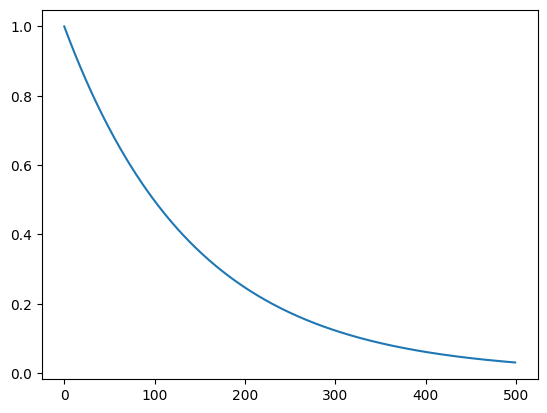

In [9]:
ptl.plot(exp_fr)

In [6]:
def calc_vibrato (note_freq, teme_step = 0.000025):
    note_form = []
    new_val = 0
    old_val = 0
    for t in np.arange(0, 1, time_step):
      new_val = np.sin(np.pi * 2 * note_freq * t)
      if (new_val >= 0 and old_val < 0):
        return note_form
      else:
        note_form.append(new_val)
        old_val = new_val
    

In [9]:
exp_fr = (calc_vibrato(100, time_step)[:-1])
exp_fr = np.multiply(exp_fr, 0.15)
exp_fr = np.add(exp_fr, 0.8)

print('const float vibrato [' + str(len(exp_fr)) + '] =  {', end = '')

for i, exp_s in enumerate(exp_fr):
    temp_str = str(round(exp_s, 5))
    
    spases = ',' + ' ' * (8 - len(temp_str))
    
    if ((i % 14) == 13):
        spases = ',\n' + ' ' * 30
    
    if (i == len(exp_fr)-1):
        print(temp_str, end='};')
    else:
        print(temp_str, end=spases)

const float vibrato [480] =  {0.8,     0.80196, 0.80393, 0.80589, 0.80785, 0.80981, 0.81177, 0.81373, 0.81568, 0.81763, 0.81958, 0.82152, 0.82347, 0.8254,
                              0.82734, 0.82926, 0.83119, 0.8331,  0.83502, 0.83692, 0.83882, 0.84072, 0.8426,  0.84448, 0.84635, 0.84822, 0.85007, 0.85192,
                              0.85376, 0.85558, 0.8574,  0.85921, 0.86101, 0.8628,  0.86458, 0.86634, 0.8681,  0.86984, 0.87157, 0.87329, 0.875,   0.87669,
                              0.87837, 0.88004, 0.8817,  0.88334, 0.88496, 0.88657, 0.88817, 0.88975, 0.89131, 0.89286, 0.8944,  0.89592, 0.89742, 0.8989,
                              0.90037, 0.90182, 0.90325, 0.90467, 0.90607, 0.90745, 0.90881, 0.91015, 0.91147, 0.91278, 0.91406, 0.91533, 0.91657, 0.9178,
                              0.919,   0.92019, 0.92135, 0.9225,  0.92362, 0.92472, 0.9258,  0.92686, 0.9279,  0.92891, 0.9299,  0.93087, 0.93182, 0.93275,
                              0.93365, 0.93453, 0.93539, 0.93622, 0

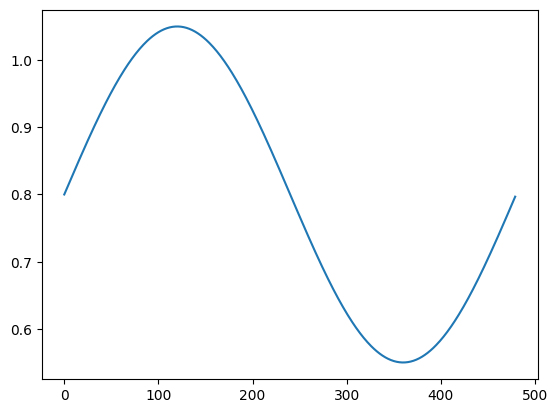

In [90]:
ptl.plot(exp_fr)

In [7]:
def calc_note_form_sin (note_mug, note_freq, DOR_K = 1241.212121, teme_step = 0.000025):
    note_form = []
    new_val = 0
    old_val = 0
    for t in np.arange(0, 0.01, time_step):
      new_val = round(note_mug * np.sin(np.pi * 2 * note_freq * t) * DOR_K)
      if (new_val >= 0 and old_val < 0):
        return note_form
      else:
        note_form.append(new_val)
        old_val = new_val
    
    

In [8]:
def calc_note_form_mndr (note_mug, note_freq, DOR_K = 1241.212121, teme_step = 0.000025):
    note_form = []
    new_val = 0
    old_val = 0
    for t in np.arange(0, 0.01, time_step):
      new_val = round(note_mug * (1 if np.sin(np.pi * 2 * note_freq * t) >= 0 else -1) * DOR_K)
      if (new_val >= 0 and old_val < 0):
        return note_form
      else:
        note_form.append(new_val)
        old_val = new_val

In [9]:


def calc_note_form_trn(note_mug, note_freq, bs, DOR_K = 1241.212121, teme_step = 0.000025):
    
    trin_form = np.arange(-1, 1, 2/bs)

    trin_form = trin_form * note_mug * DOR_K
    
    trin_form = trin_form[0: bs]
    
    return (np.around(trin_form)).astype(int)


In [52]:
def print_form_note(note_name, note_form, note_form_style, size_tabs = 40, end = '\n\n'):
    
    data_type = "const int32_t "
    define_form_string = data_type + note_name + '_form_' + note_form_style + ' [' + str(len(note_form)) + '] ='
    temp = len(define_form_string)
    define_form_string += ' ' * (size_tabs - temp - 1) + '{'
    
    print(define_form_string, end = '')
    
    for i, n in enumerate(note_form):
      if (n >= 0):
        if (n < 10):
          spases = ',    '
        elif (n < 100):
          spases = ',   '
        else:
          spases = ',  '
      else:
        if (n > -10):
          spases = ',   '
        elif (n > -100):
          spases = ',  '
        else:
          spases = ', '

      if ((i % 20) == 19):
        spases = ',\n' + ' ' * size_tabs

      if (i == len(note_form)-1):
        print(n, end='};')
      else:
        print(n, end=spases)
    
    print(end, end = '')


In [11]:
note_magnitude = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
sizes = []

for n, m, f in zip(note_names, note_magnitude, note_frequency_Hz):
    nt_fm = calc_note_form_sin(m, f)
    sizes.append(len(nt_fm))
    print_form_note(n, nt_fm, note_form_style[0])
    
    
print('const int32_t PAUSE_form_sin [30] = {0};' ,end = '\n\n')
    


for i, n in enumerate(note_names):
    if (i == 0):
        print('const int32_t *note_sin_table[21] =    {' + n + '_form_' + note_form_style[0] + ',')
    else:
        print(' ' * 40 + n + '_form_' + note_form_style[0] + ',')
        
print(' ' * 40 + 'PAUSE_form_sin};', end = '\n\n')

sizes.append(30)

temp_str = str(sizes)
temp_str = temp_str.replace('[', '{')
temp_str = temp_str.replace(']', '}')
print('uint8_t note_form_size[21] = ' + temp_str + ';')

const int32_t A_m_form_sin [219] =     {0,    7,    14,   21,   29,   36,   43,   50,   57,   64,   71,   77,   84,   91,   97,   104,  110,  117,  123,  129,
                                        135,  141,  147,  153,  158,  164,  169,  174,  179,  184,  189,  193,  198,  202,  206,  210,  214,  217,  221,  224,
                                        227,  230,  232,  235,  237,  239,  241,  242,  244,  245,  246,  247,  248,  248,  248,  248,  248,  248,  247,  246,
                                        245,  244,  243,  241,  239,  237,  235,  232,  230,  227,  224,  221,  218,  214,  210,  206,  202,  198,  194,  189,
                                        184,  180,  175,  169,  164,  159,  153,  147,  142,  136,  130,  124,  117,  111,  105,  98,   91,   85,   78,   71,
                                        64,   57,   50,   43,   36,   29,   22,   15,   8,    1,    -6,   -14,  -21,  -28,  -35,  -42,  -49,  -56,  -63,  -70,
                                        -77,  -

In [12]:
note_magnitude = [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]
sizes = []

for n, m, f in zip(note_names, note_magnitude, note_frequency_Hz):
    nt_fm = calc_note_form_mndr(m, f)
    sizes.append(len(nt_fm))
    print_form_note(n, nt_fm, note_form_style[1])
    
    
print('const int32_t PAUSE_form_mndr [30] = {0};' ,end = '\n\n')
    


for i, n in enumerate(note_names):
    if (i == 0):
        print('const int32_t *note_mndr_table[21] =   {' + n + '_form_' + note_form_style[1] + ',')
    else:
        print(' ' * 40 + n + '_form_' + note_form_style[1] + ',')
        
print(' ' * 40 + 'PAUSE_form_mndr};', end = '\n\n')

sizes.append(30)

temp_str = str(sizes)
temp_str = temp_str.replace('[', '{')
temp_str = temp_str.replace(']', '}')
print('uint8_t note_form_size[21] = ' + temp_str + ';')

const int32_t A_m_form_mndr [219] =    {186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,
                                        186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,
                                        186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,
                                        186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,
                                        186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  186,
                                        186,  186,  186,  186,  186,  186,  186,  186,  186,  186,  -186, -186, -186, -186, -186, -186, -186, -186, -186, -186,
                                        -186,

In [13]:
note_magnitude = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
buf_sizes = [219, 206, 195, 184, 174, 164, 155, 146, 138, 130, 123, 115, 110, 103, 98, 92, 87, 82, 78, 73, 30]
sizes = []

for n, m, f, bs in zip(note_names, note_magnitude, note_frequency_Hz, buf_sizes):
    nt_fm = calc_note_form_trn(m, f, bs)
    sizes.append(len(nt_fm))
    print_form_note(n, nt_fm, note_form_style[2])
    
    
print('const int32_t PAUSE_form_trin [30] = {0};' ,end = '\n\n')
    


for i, n in enumerate(note_names):
    if (i == 0):
        print('const int32_t *note_trin_table[21] =   {' + n + '_form_' + note_form_style[2] + ',')
    else:
        print(' ' * 40 + n + '_form_' + note_form_style[2] + ',')
        
print(' ' * 40 + 'PAUSE_form_trin};', end = '\n\n')

sizes.append(30)

temp_str = str(sizes)
temp_str = temp_str.replace('[', '{')
temp_str = temp_str.replace(']', '}')
print('uint8_t note_form_size[21] = ' + temp_str + ';')

const int32_t A_m_form_trin [219] =    {-248, -246, -244, -241, -239, -237, -235, -232, -230, -228, -226, -223, -221, -219, -217, -214, -212, -210, -207, -205,
                                        -203, -201, -198, -196, -194, -192, -189, -187, -185, -182, -180, -178, -176, -173, -171, -169, -167, -164, -162, -160,
                                        -158, -155, -153, -151, -148, -146, -144, -142, -139, -137, -135, -133, -130, -128, -126, -124, -121, -119, -117, -114,
                                        -112, -110, -108, -105, -103, -101, -99,  -96,  -94,  -92,  -90,  -87,  -85,  -83,  -80,  -78,  -76,  -74,  -71,  -69,
                                        -67,  -65,  -62,  -60,  -58,  -56,  -53,  -51,  -49,  -46,  -44,  -42,  -40,  -37,  -35,  -33,  -31,  -28,  -26,  -24,
                                        -22,  -19,  -17,  -15,  -12,  -10,  -8,   -6,   -3,   -1,   1,    3,    6,    8,    10,   12,   15,   17,   19,   22,
                                        24, 

In [3]:
from scipy.io import wavfile
samplerate, data = wavfile.read('./sampl1.wav')


C:\Users\Vlad\AppData\Local\Temp\ipykernel_3008\2920367340.py:2: WavFileWarning: Reached EOF prematurely; finished at 1206 bytes, expected 1210 bytes from header.
  samplerate, data = wavfile.read('./sampl1.wav')


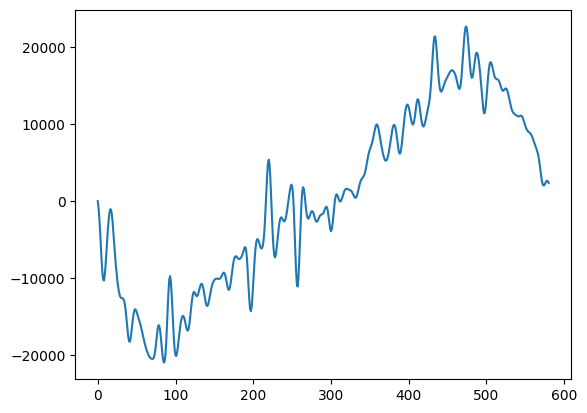

In [4]:
ptl.plot(data)

In [10]:
data

array([   -38,   -926,  -2228,  -3944,  -5918,  -7854,  -9404, -10276,
       -10340,  -9642,  -8388,  -6838,  -5230,  -3740,  -2486,  -1570,
        -1090,  -1116,  -1658,  -2650,  -3954,  -5396,  -6808,  -8092,
        -9214, -10186, -11010, -11680, -12170, -12472, -12612, -12648,
       -12666, -12760, -13024, -13542, -14346, -15378, -16492, -17478,
       -18134, -18324, -18026, -17332, -16418, -15490, -14728, -14250,
       -14084, -14180, -14444, -14776, -15110, -15430, -15754, -16112,
       -16526, -16990, -17474, -17946, -18380, -18770, -19122, -19440,
       -19726, -19972, -20172, -20328, -20440, -20516, -20556, -20536,
       -20390, -20024, -19380, -18494, -17516, -16672, -16184, -16190,
       -16704, -17612, -18712, -19770, -20586, -21006, -20886, -20082,
       -18524, -16342, -13892, -11678, -10198,  -9772, -10452, -12030,
       -14116, -16268, -18114, -19414, -20086, -20162, -19754, -19014,
       -18106, -17178, -16342, -15674, -15216, -14978, -14960, -15158,
      

In [31]:
old_sempl = 0
fulldata = []



for i in data:
    full_sptep = i - old_sempl
    step = round(full_sptep / 10)
    if (step != 0):
        fulldata += (list(range(old_sempl, i, step)))
    else:
        fulldata += ([i for x in range(1, 10)])
    old_sempl = i

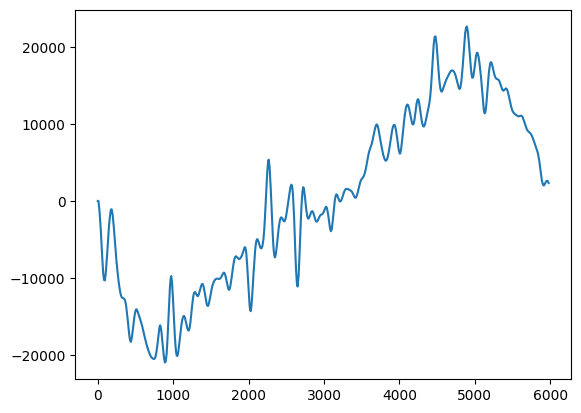

In [32]:
ptl.plot(fulldata)

In [54]:
def gitar_sampl(note_mug, sampl_form, note_sampl_size):
    
    note_form = []
    scale_val = max(sampl_form) / note_mug 
    
    for i in range(0, note_sampl_size):
        sampl = sampl_form[i*int(len(fulldata)/note_sampl_size)]
        note_form.append(int(round(sampl / scale_val)))
    
    return note_form

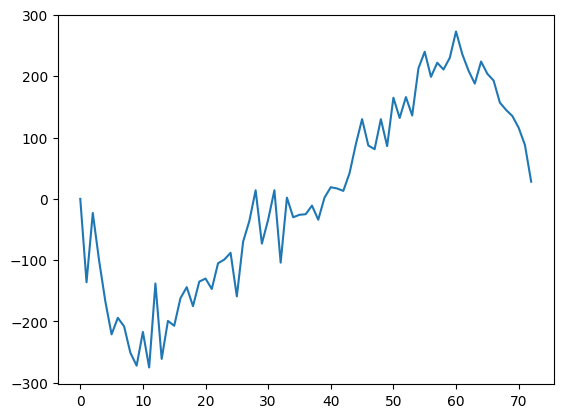

In [48]:
ptl.plot(gitar_sampl(300, fulldata,))

In [60]:
note_magnitude = [300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300]
buf_sizes = [219, 206, 195, 184, 174, 164, 155, 146, 138, 130, 123, 115, 110, 103, 98, 92, 87, 82, 78, 73, 30]
sizes = []

for n, m, f, bs in zip(note_names, note_magnitude, note_frequency_Hz, buf_sizes):
    nt_fm = gitar_sampl(m, fulldata, bs)
    sizes.append(len(nt_fm))
    print_form_note(n, nt_fm, 'gitr')
    
    
print('const int32_t PAUSE_form_gitr [30] = {0};' ,end = '\n\n')
    


for i, n in enumerate(note_names):
    if (i == 0):
        print('const int32_t *note_gitr_table[21] =   {' + n + '_form_' + 'gitr' + ',')
    else:
        print(' ' * 40 + n + '_form_' + 'gitr' + ',')
        
print(' ' * 40 + 'PAUSE_form_gitr};', end = '\n\n')

sizes.append(30)

temp_str = str(sizes)
temp_str = temp_str.replace('[', '{')
temp_str = temp_str.replace(']', '}')
print('uint8_t note_form_gitr_size[21] = ' + temp_str + ';')

const int32_t A_m_form_gitr [219] =    {0,    -24,  -83,  -135, -121, -69,  -26,  -18,  -51,  -95,  -132, -156, -167, -168, -182, -215, -241, -229, -199, -187,
                                        -195, -205, -218, -233, -247, -259, -267, -271, -271, -256, -224, -219, -252, -278, -253, -178, -130, -173, -241, -266,
                                        -247, -215, -199, -204, -219, -220, -192, -162, -158, -164, -156, -144, -148, -168, -181, -169, -150, -139, -134, -134,
                                        -134, -128, -123, -134, -150, -149, -125, -102, -96,  -99,  -99,  -92,  -81,  -93,  -149, -189, -154, -98,  -68,  -71,
                                        -81,  -75,  -36,  37,   69,   17,   -64,  -97,  -76,  -43,  -29,  -33,  -33,  -15,  11,   28,   2,    -86,  -145, -100,
                                        -11,  23,   -2,   -28,  -27,  -18,  -22,  -34,  -34,  -26,  -23,  -19,  -10,  -20,  -46,  -46,  -12,  10,   6,    -1,
                                        5, 

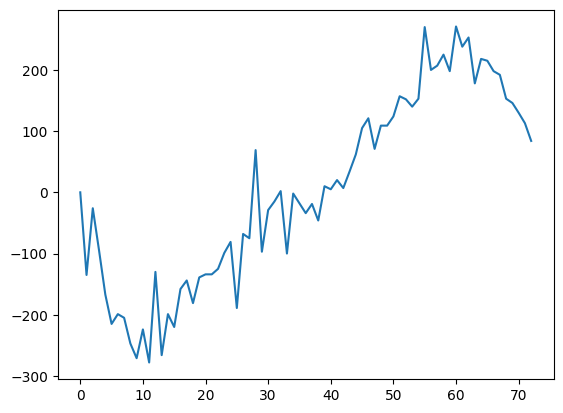

In [57]:
test = [0,    -135, -26,  -95,  -167, -215, -199, -205, -247, -271, -224, -278, -130, -266, -199, -220, -158, -144, -181, -139,
                                        -134, -134, -125, -99,  -81,  -189, -68,  -75,  69,   -97,  -29,  -15,  2,    -100, -2,   -18,  -34,  -19,  -46,  10,
                                        5,    20,   7,    34,   62,   105,  121,  71,   109,  109,  124,  157,  152,  140,  153,  270,  200,  207,  225,  198,
                                        271,  238,  253,  178,  218,  215,  198,  192,  153,  146,  130,  113,  84]

ptl.plot(test)